# Imported Library

Please import all necessary library that will be needed in this kernel here.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling
%matplotlib inline
import os
os.getcwd()

'/Users/zibilal/Documents/projects/understanding/emlai/docs/week4'

# Imported Dataset

Please import your dataset in pandas dataframe form. You can find the dataset in '../data/' directory. Don't forget to display the 5 top and size of dataset to give us initial idea about what kind dataset that we're going to analyze.

In [6]:
data = pd.read_csv('data/cs_train.csv')
data.head()

,STATUS_OF_EXISTING_CHECKING_ACCOUNT,DURATION_IN_MONTH,CREDIT_HISTORY,PURPOSE,CREDIT_AMOUNT,SAVINGS_ACCOUNT/BONDS,PRESENT_EMPLOYMENT_SINCE,INSTALLMENT_RATE_IN_PERCENTAGE_OF_DISPOSABLE_INCOME,PERSONAL_STATUS_AND_SEX,OTHER_DEBTORS/GUARANTORS,...,PROPERTY,AGE_IN_YEARS,OTHER_INSTALLMENT_PLANS,HOUSING,NUMBER_OF_EXISTING_CREDITS_AT_THIS_BANK,JOB,NUMBER_OF_PEOPLE_BEING_LIABLE_TO_PROVIDE_MAINTENANCE_FOR,TELEPHONE,FOREIGN_WORKER,CREDIT_SCORE
0,A11,6.0,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1.0,A192,A201,1
1,A12,48.0,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1.0,A191,A201,2
2,A14,12.0,A34,A46,2096.0,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1.0,A172,2.0,A191,A201,1
3,A11,42.0,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2.0,A191,A201,1
4,A11,24.0,A33,A40,4870.0,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2.0,A173,2.0,A191,A201,2


<hr>

# Domain Knowledge Analysis

Please state your domain knowledge to make a hypothesis (unproved) related to this case. To do this task, you are demanded to learn a little bit about study field which is related to this case.

__Hypothesis:__

My hypothesis is that, a person is more likely to pay credit if he has high salary and single (without family) with enough working experience. These factors can be reflected at: 

* Status of Existing Account (Column 1)
* Job (Column 17)
* Saving Accounts (Column 6)
* Present Employment Since (Column 7)
* Personal Status (column 9)
* Age in years (column 13)
* Number of People Being Liable to Provide Mainteenance for (Column 18)

And also foreign worker are more likely to have higher salary which is in Column 20 and can also be considered as the main factors. Other supporting factor are his credit history, installment rate from income, etc. But this factor can also misleading as a person with high salary may have bad credit history at the start of his career as his salary is still low. Supporting factors:

* Credit History (Column 3)
* Credit Amount (Column 5)
* Number of Existing Credits at this Bank (Column 16)

* Purpose (Column 4)
* Duration in Month (Column 2)
* Other Debitors/Guarantors (Column 10) 

All the supporting factors are related to his intention to borrow money from the bank (credit). But the main factor such as age, status, and salary will probably has the highest impact. We will see at the Exploratory Data Analysis (EDA) below, whether the null hypothesis can be rejected. This hypothesis might be weak, partly because I don't have enough background from finance or economy to have a strong foundation. Other unrelated factors are:

* Present Residence Since (Column 11)
* Housing (Column 15)
* Telephone (Column 19)
* Other Installment Plans (Column 14)

<hr>

# Exploratory Data Analysis

Please do mind that what you will analyze in this section must be correlated or make sense to your model performance.

## Feature Explanation

Please explain the meaning of each feature that was contained in our dataset. You can reexplain each features if we already have features explanation in "Case Description" section or you can expand the explanation if you feel the explanations are not enough.

### Feature Columns:

__1. STATUS_OF_EXISTING_CHECKING_ACCOUNT__ <br>
     This categorical column explain how much salary the person has at a monthly basis under 1 year.<br> 
     A11: < 0 DM <br>
     A12: 0 <= 200 DM <br>
     A13: >= 200 DM <br>
     A14: No bank account <br>
     While DM is a somekind of currency or metrics 
     
__2. DURATION_IN_MONTH__ <br>
     This numerical column has a credit duration in month
     
__3. CREDIT_HISTORY__ <br>
     This categorical column gives detail of a person past credit history. <br>
     A30: has no credit at all <br>
     A31: has no credit at current bank <br> 
     A32: the available credit has not yet reached deadline <br>
     A33: credit has passed deadline <br>
     A44: there are credits with other bank
     
__4. PURPOSE__ <br>
     These are the purposes of his credit proposal. <br>
     A40: car (new) <br> 
     A41: car (second) <br> 
     A42: furniture/tools <br> 
     A43: radio/television <br>
     A44: household goods <br>
     A45: reparation <br>
     A46: education <br> 
     A47: vacation <br> 
     A48: retraining <br> 
     A49: business <br> 
     A410: others <br> 
     
__5. CREDIT_AMOUNT__ <br>
     This numerical column has values of credit the particular person of interest propose to have
     
__6. SAVINGS_ACCOUNT/BONDS__ <br>
     This categorical columns has a range of values from the person bank account savings <br>
     A61: < 100 DM <br>
     A62: 100 <= ... < 500 DM <br>
     A63: 500 <= ... < 1000 DM <br>
     A64: >= 1000 DM <br> 
     A65: no savings at all
     
__7. PRESENT_EMPLOYMENT_SINCE__ <br>
     This categorical column explain the duration of a person employment <br>  
     A71: unemployed <br>
     A72: < 1 year <br>
     A73: 1 <= ... <= 4 years <br>
     A74: 4 <= ... <= 7 years <br>
     A75: >= 7 years <br>
 
__8. INSTALLMENT_RATE_IN_PERCENTAGE_OF_DISPOSABLE_INCOME__ <br>
     This numerical column give details of a person regular credit payment from his gross salary

__9. PERSONAL_STATUS_AND_SEX__ <br>
     This categorical column has a gender along with marital status <br>
     A91: Divorced Man <br>
     A92: Divorced Woman <br>
     A93: Single Man <br>
     A94: Married Man <br>
     A95: Single Women <br>

__10. OTHER_DEBITORS/GUARANTORS__ <br>
      This categorical column have status whether a person has other debitor <br>
      A101: no debitor <br>
      A102: co-applicant <br>
      A103: guarantor <br>

__11. PRESENT_RESIDENCE_SINCE__ <br>
      This numerical column has values of a person duration of current place of residence in years

__12. PROPERTY__ <br>
      This categorical column explains type of properties the person own <br>
      A121: real estate <br>
      A122: self insurance <br>
      A123: car and others <br>
      A124: unknown or no property <br>

__13. AGE_IN_YEARS__ <br>
      This numerical column display the person age in years

__14. OTHER_INSTALLMENT_PLANS__ <br>
      This categorical column state that person plans of other credits <br>
      A141: bank <br>
      A142: stores <br>
      A143: no plans <br>

__15. HOUSING__ <br>
      This categorical column has a type of living/accomodation place that person has <br>
      A151: rent <br> 
      A152: owned <br>
      A153: free

__16. NUMBER_OF_EXISTING_CREDITS_AT_THIS_BANK__ <br>
      This numerical column has values of credits that person currently has  

__17. JOB__ <br>
      This categorical column has a type of job position of the person of interest <br>
      A171: unemployed/inexperience <br>
      A172: inexperience <br>
      A173: experienced/official employee <br>
      A174: management/own a business/high qualification employee

__18. NUMBER_OF_PEOPLE_BEING_LIABLE_TO_PROVIDE_MAINTENANCE_FOR__ <br>
      This numerical column give details of how many people that person must provide money for living

__19. TELEPHONE__ <br>
      This categorical column states whether a person has listed phone number or not <br>
      A191: no <br>
      A192: yes, listed as customer's name
      
__20. FOREIGN_WORKER__ <br>
      This categorical column give status of expatriate <br> 
      A201: yes <br>
      A202: no

## Null value analysis

Please analyze how much null value that was contained in our dataset. You can choose your prefered method for null value handling but in default, you can choose one of three methods below:
1. fill them with median value,
2. drop rows that contain null value, or
3. drop columns that contain null value

You can review what you learned first to choose the best method for our dataset.

In [7]:
# Null value composition
null_columns = data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

STATUS_OF_EXISTING_CHECKING_ACCOUNT                         5
DURATION_IN_MONTH                                           3
CREDIT_HISTORY                                              1
CREDIT_AMOUNT                                               1
SAVINGS_ACCOUNT/BONDS                                       2
INSTALLMENT_RATE_IN_PERCENTAGE_OF_DISPOSABLE_INCOME         1
PERSONAL_STATUS_AND_SEX                                     2
OTHER_DEBTORS/GUARANTORS                                    2
PROPERTY                                                    3
AGE_IN_YEARS                                                1
HOUSING                                                     1
NUMBER_OF_EXISTING_CREDITS_AT_THIS_BANK                     1
JOB                                                         1
NUMBER_OF_PEOPLE_BEING_LIABLE_TO_PROVIDE_MAINTENANCE_FOR    2
TELEPHONE                                                   1
FOREIGN_WORKER                                              2
dtype: i

In [3]:
# Null value composition
null_columns = data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

STATUS_OF_EXISTING_CHECKING_ACCOUNT                         5
DURATION_IN_MONTH                                           3
CREDIT_HISTORY                                              1
CREDIT_AMOUNT                                               1
SAVINGS_ACCOUNT/BONDS                                       2
INSTALLMENT_RATE_IN_PERCENTAGE_OF_DISPOSABLE_INCOME         1
PERSONAL_STATUS_AND_SEX                                     2
OTHER_DEBTORS/GUARANTORS                                    2
PROPERTY                                                    3
AGE_IN_YEARS                                                1
HOUSING                                                     1
NUMBER_OF_EXISTING_CREDITS_AT_THIS_BANK                     1
JOB                                                         1
NUMBER_OF_PEOPLE_BEING_LIABLE_TO_PROVIDE_MAINTENANCE_FOR    2
TELEPHONE                                                   1
FOREIGN_WORKER                                              2
dtype: i

In [4]:
null_values = pd.DataFrame(data[null_columns].isnull().sum().reset_index())
null_values.columns = ['Columns','Number of Null Values']
print('Percentage of missing values from total data: %.2f %%'
      %(null_values['Number of Null Values'].sum() / len(data) * 100)) 

Percentage of missing values from total data: 3.22 %


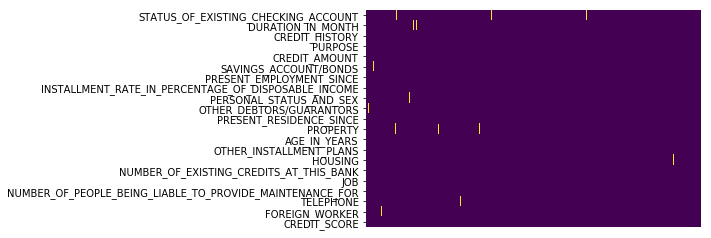

In [5]:
# Null value visualization
sns.heatmap(data.isnull().transpose(),cmap='viridis',cbar=False,xticklabels=False)

<hr>
From the plot it can be seen that there are some missing values (__yellow color__)

In [6]:
# One of the column with null values
data[data['STATUS_OF_EXISTING_CHECKING_ACCOUNT'].isnull()][null_columns]

,STATUS_OF_EXISTING_CHECKING_ACCOUNT,DURATION_IN_MONTH,CREDIT_HISTORY,CREDIT_AMOUNT,SAVINGS_ACCOUNT/BONDS,INSTALLMENT_RATE_IN_PERCENTAGE_OF_DISPOSABLE_INCOME,PERSONAL_STATUS_AND_SEX,OTHER_DEBTORS/GUARANTORS,PROPERTY,AGE_IN_YEARS,HOUSING,NUMBER_OF_EXISTING_CREDITS_AT_THIS_BANK,JOB,NUMBER_OF_PEOPLE_BEING_LIABLE_TO_PROVIDE_MAINTENANCE_FOR,TELEPHONE,FOREIGN_WORKER
71,NaN,7.0,A34,730.0,A65,4.0,A93,A101,A122,46.0,A151,2.0,A172,1.0,A192,A201
84,NaN,10.0,A32,2315.0,A61,3.0,A93,A101,A121,52.0,A152,1.0,A172,1.0,A191,A201
150,NaN,6.0,A32,1346.0,A62,2.0,A93,A101,A124,42.0,A153,1.0,A173,2.0,A192,A201
339,NaN,10.0,A32,1521.0,A61,4.0,A91,A101,A123,31.0,A152,1.0,A172,1.0,A191,A201
594,NaN,24.0,A31,1358.0,A65,4.0,A93,A101,A123,40.0,A152,1.0,A174,1.0,A192,A201


<hr>
Because only ~3% of dataset is null values, we can drop those columns and hopefully stil gives a good prediction.<br>
What we can also do is fill tha null values by forward fill.

In [7]:
# Null value handling
data.fillna(method='ffill',inplace=True)

## Irregular value analysis

1. Please analyze if there are some irregular value that was contained in our dataset. 
2. Please refer to "Feature Explanations" to know the meaning of each features so you can identify if there is irregular value in one or more features. 
3. Please explain the method that you use for irregular value handling.
4. Please seperate each cell for irregular value handling in each feature

<div style='color:red;font-weight:bold'>NB: You can skip this step if you feel there are no irregular values in our dataset</div>

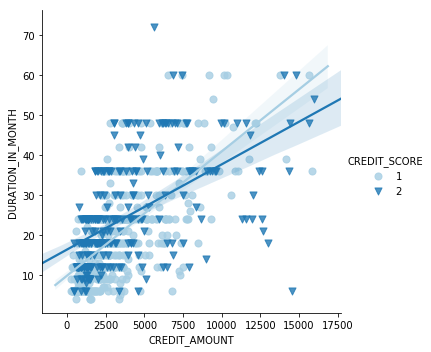

In [8]:
# Irregular value handling feature 1
sns.lmplot(x='CREDIT_AMOUNT',y='DURATION_IN_MONTH',data=data,hue='CREDIT_SCORE',markers=['o','v'],
          scatter_kws={'s':50},palette='Paired')

As it can be seen there are some outliers, for now I will leave it be. Let's hope this gives the best prediction.

In [9]:
# Irregular value handling feature 2

In [10]:
# Irregular value handling feature 3

In [11]:
# And keep on....

## Data type analysis

It's important to make sure that each feature already use correct data type. Please make sure all features already use correct data type based on whether the feature is categorical or numerical. Please change:
1. categorical feature into 'int64', and
2. numerical feature into 'float64'

In [12]:
# Data type display
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 21 columns):
STATUS_OF_EXISTING_CHECKING_ACCOUNT                         900 non-null object
DURATION_IN_MONTH                                           900 non-null float64
CREDIT_HISTORY                                              900 non-null object
PURPOSE                                                     900 non-null object
CREDIT_AMOUNT                                               900 non-null float64
SAVINGS_ACCOUNT/BONDS                                       900 non-null object
PRESENT_EMPLOYMENT_SINCE                                    900 non-null object
INSTALLMENT_RATE_IN_PERCENTAGE_OF_DISPOSABLE_INCOME         900 non-null float64
PERSONAL_STATUS_AND_SEX                                     900 non-null object
OTHER_DEBTORS/GUARANTORS                                    900 non-null object
PRESENT_RESIDENCE_SINCE                                     900 non-null int64
PROPERTY     

In [13]:
# Data type handling
# Categorical Columns
data[data.select_dtypes(['object']).columns] = data[data.select_dtypes(['object']).columns].astype('category')
data[data.select_dtypes(['category']).columns] = data[data.select_dtypes(['category']).columns].apply(lambda x: x.cat.codes)
data[data.select_dtypes(['int8']).columns] = data[data.select_dtypes(['int8']).columns].astype(np.int64)

# Numerical Columns
data['PRESENT_RESIDENCE_SINCE'] = data['PRESENT_RESIDENCE_SINCE'].astype(np.float64)
data.head()

,STATUS_OF_EXISTING_CHECKING_ACCOUNT,DURATION_IN_MONTH,CREDIT_HISTORY,PURPOSE,CREDIT_AMOUNT,SAVINGS_ACCOUNT/BONDS,PRESENT_EMPLOYMENT_SINCE,INSTALLMENT_RATE_IN_PERCENTAGE_OF_DISPOSABLE_INCOME,PERSONAL_STATUS_AND_SEX,OTHER_DEBTORS/GUARANTORS,...,PROPERTY,AGE_IN_YEARS,OTHER_INSTALLMENT_PLANS,HOUSING,NUMBER_OF_EXISTING_CREDITS_AT_THIS_BANK,JOB,NUMBER_OF_PEOPLE_BEING_LIABLE_TO_PROVIDE_MAINTENANCE_FOR,TELEPHONE,FOREIGN_WORKER,CREDIT_SCORE
0,0,6.0,4,4,1169.0,4,4,4.0,2,0,...,0,67.0,2,1,2.0,2,1.0,1,0,1
1,1,48.0,2,4,5951.0,0,2,2.0,1,0,...,0,22.0,2,1,1.0,2,1.0,0,0,2
2,3,12.0,4,7,2096.0,0,3,2.0,2,0,...,0,49.0,2,1,1.0,1,2.0,0,0,1
3,0,42.0,2,3,7882.0,0,3,2.0,2,2,...,1,45.0,2,2,1.0,2,2.0,0,0,1
4,0,24.0,3,0,4870.0,0,2,3.0,2,0,...,3,53.0,2,2,2.0,2,2.0,0,0,2


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 21 columns):
STATUS_OF_EXISTING_CHECKING_ACCOUNT                         900 non-null int64
DURATION_IN_MONTH                                           900 non-null float64
CREDIT_HISTORY                                              900 non-null int64
PURPOSE                                                     900 non-null int64
CREDIT_AMOUNT                                               900 non-null float64
SAVINGS_ACCOUNT/BONDS                                       900 non-null int64
PRESENT_EMPLOYMENT_SINCE                                    900 non-null int64
INSTALLMENT_RATE_IN_PERCENTAGE_OF_DISPOSABLE_INCOME         900 non-null float64
PERSONAL_STATUS_AND_SEX                                     900 non-null int64
OTHER_DEBTORS/GUARANTORS                                    900 non-null int64
PRESENT_RESIDENCE_SINCE                                     900 non-null float64
PROPERTY          

## Feature correlation analysis

The purpose of this section to find if there are possibility of multi-correlation between features and in the same time to get insight about which features (X) that have good correlation with our target (y).

### 1. Heatmap correlation

Heatmap is one of simplest method to analyze feature correlation. Please do:
1. make heatmap correlation with only features (X) - we need to know correlation between features and avoid multi-correlation features,
2. make heatmap correlation with features (X) and target (y) - we need to know which features that have good correlation with our target,

You can select some good features only (highlighting) to make the plots clearer.

In [15]:
# rename columns for plotting purpose (column names are too long)
data.columns = ['stat_acc','dur','cr_hist', 'pur','cr_amt','sav_acc',
                'emp_dur','inst_rate','stat_sex','deb_guar_stat',
                'res_dur','prop', 'age','inst_plans', 'housing',
                'num_cr','job','num_liable','phone','expat_stat','cr_score']

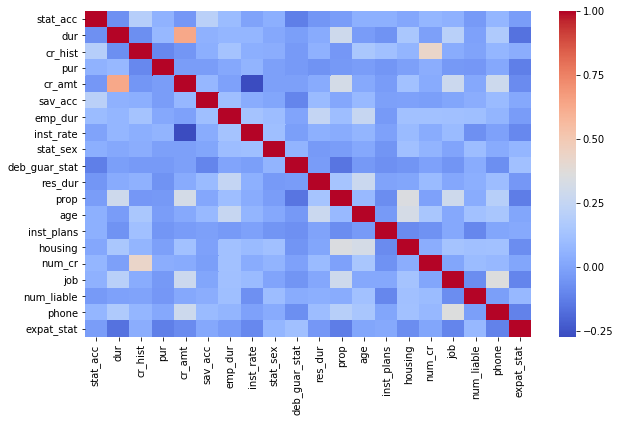

In [16]:
# Heatmap correlation with only features (X)
plt.figure(figsize=(10,6))
sns.heatmap(data.iloc[:,:-1].corr(),cmap='coolwarm')

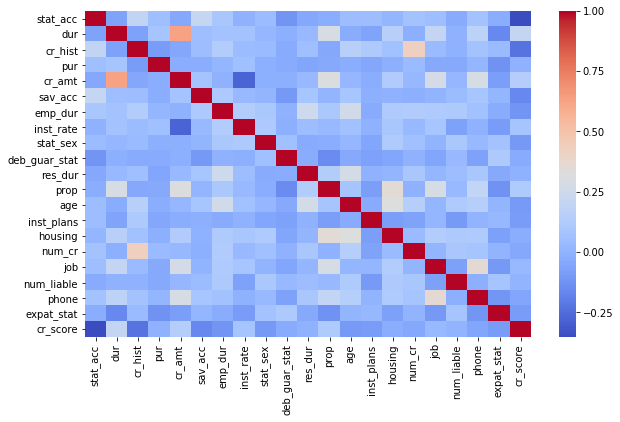

In [17]:
# Heatmap correlation with features (X) and target (y)
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap='coolwarm')

### 2. Pairplot correlation

Sometimes we want to see the real condition of what our heatmap correlation showed us before. Please make a pairplot to know scatter point visualization between features and target also.

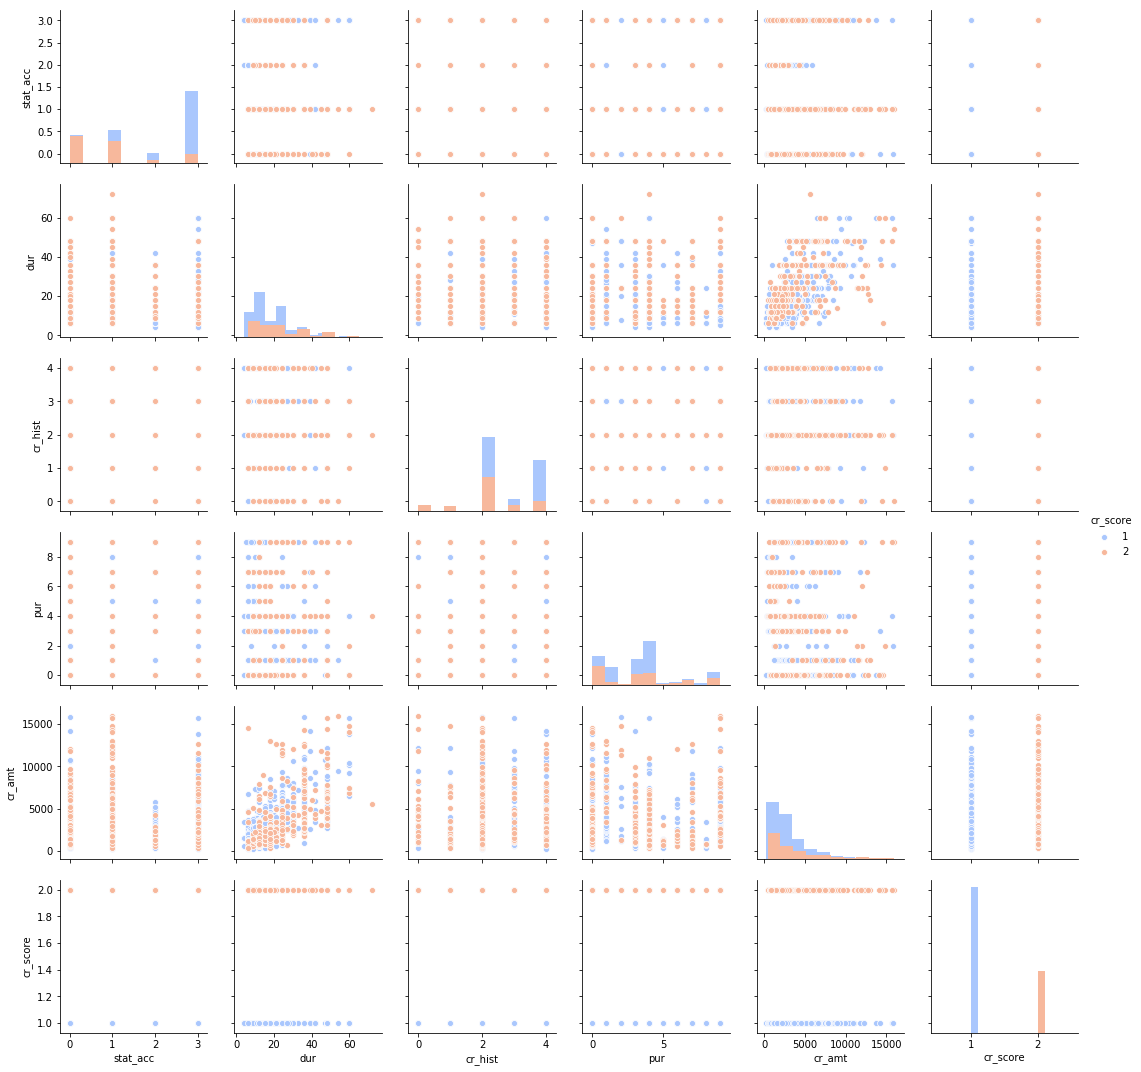

In [18]:
# Pairplot with features (X) and target (y)
# First five columns
sns.pairplot(data[['stat_acc','dur','cr_hist','pur','cr_amt','cr_score']],diag_kind='hist',hue='cr_score',palette='coolwarm')

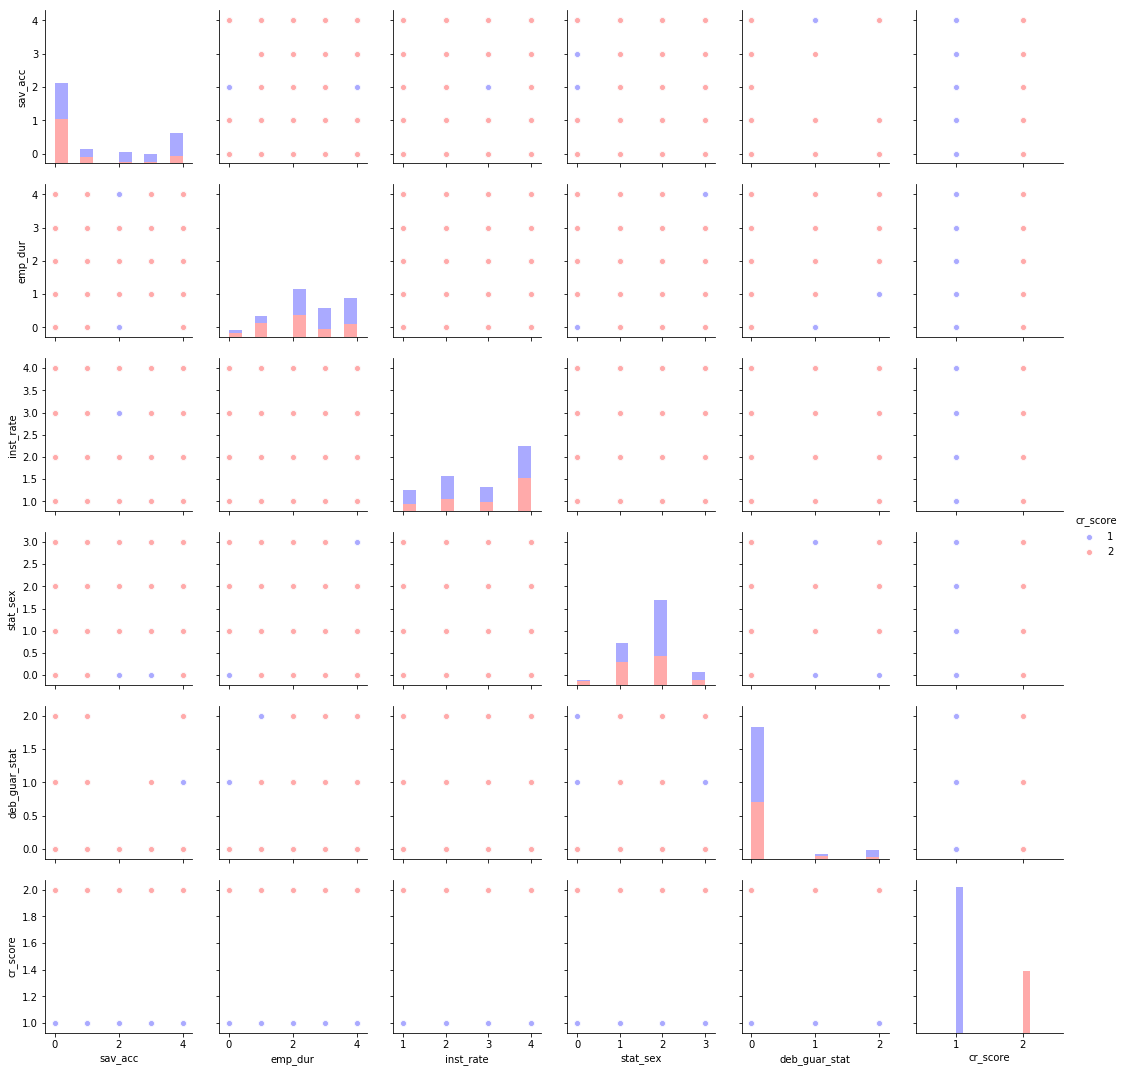

In [19]:
# Next five columns
sns.pairplot(data[['sav_acc','emp_dur','inst_rate','stat_sex','deb_guar_stat','cr_score']],diag_kind='hist',hue='cr_score',
             palette='bwr')

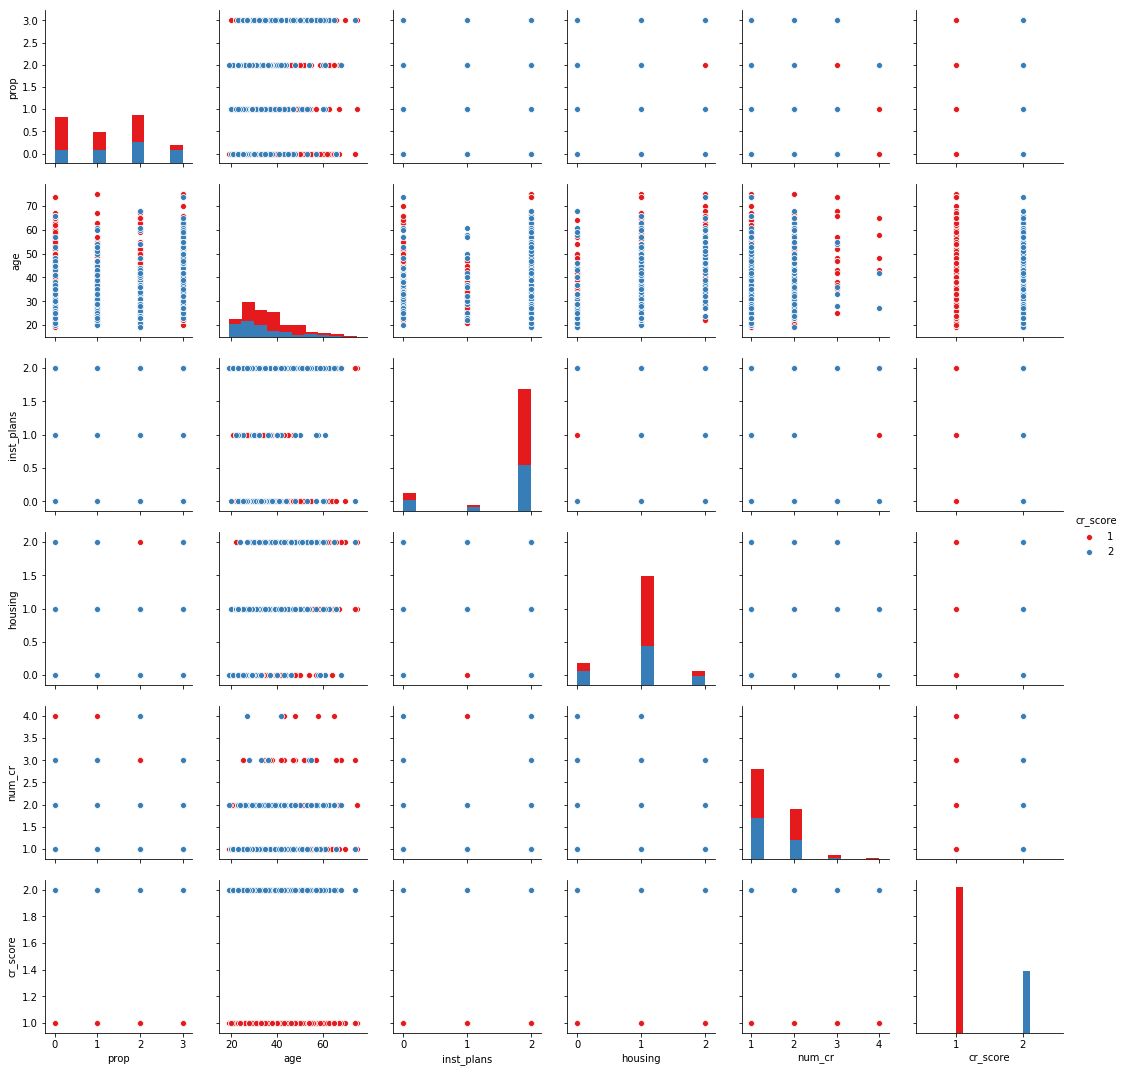

In [20]:
# Next five columns
sns.pairplot(data[['prop', 'age','inst_plans', 'housing','num_cr','cr_score']],diag_kind='hist',hue='cr_score',palette='Set1')

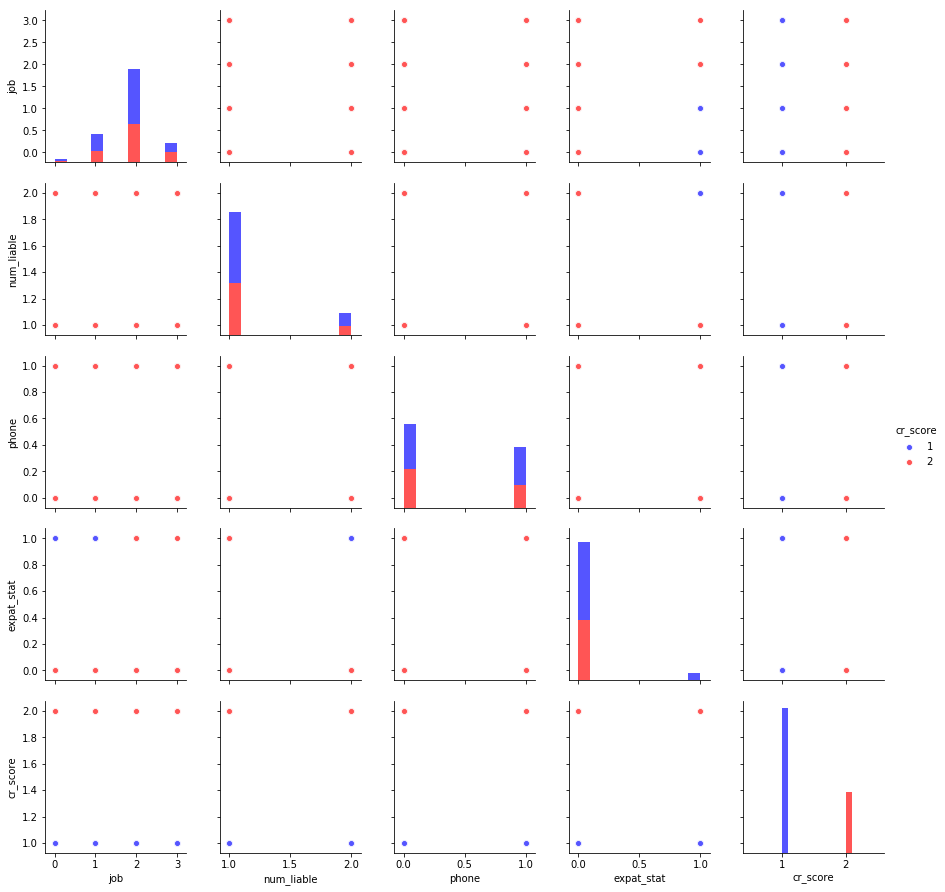

In [21]:
# Next five columns
sns.pairplot(data[['job','num_liable','phone','expat_stat','cr_score']],diag_kind='hist',hue='cr_score',palette='seismic')

<hr>
From above we can see that the classes or labels are not highly separable if paired with other columns unless with the label column itself. We can see the most clear example from the __AGE_IN_YEARS__ and __JOB__ Columns. 

There are some high correlation between __CREDIT_AMOUNT__ and __DURATION_IN_MONTH__ column as seen with the scatter plot and heatmap.

### 3. Correlation summary report

It's easier for us to analyze if we have a summary report. Please make a summary report using <b>Pandas Profiling</b> library, you can ask your instructor if you are not sure about this task.

In [22]:
# Correlation summary report with pandas profiling
pandas_profiling.ProfileReport(data)

Number of variables,21
Number of observations,900
Total Missing (%),0.0%
Total size in memory,147.7 KiB
Average record size in memory,168.1 B
Numeric,17
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,0


## Distribution analysis

Please make:
1. distribution plot for each numerical feature - we need to know how is distribution shape for each numerical feature
2. histogram for each categorical feature - we need to know how is distribution for each distinct value in each feature

<div style='color:red'>
    <b>
        NB: Please do: <br>
        1. separate each feature's plot, and <br>
        2. give good title and good axis title for each plot
    </b>
</div>

## Numerical Feature

In [23]:
data.select_dtypes('float64').columns

Index(['dur', 'cr_amt', 'inst_rate', 'res_dur', 'age', 'num_cr', 'num_liable'], dtype='object')

Text(0, 0.5, 'Frequency')

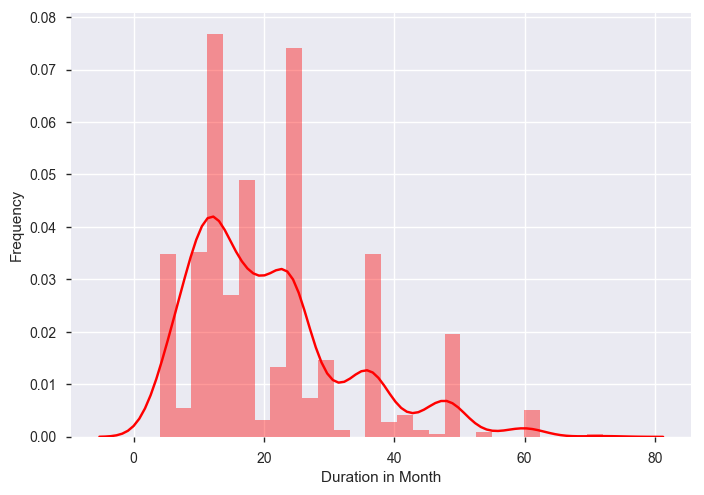

In [24]:
# Distribution analysis feature 1
ax = sns.distplot(data['dur'],color='r')
ax.set_xlabel('Duration in Month')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

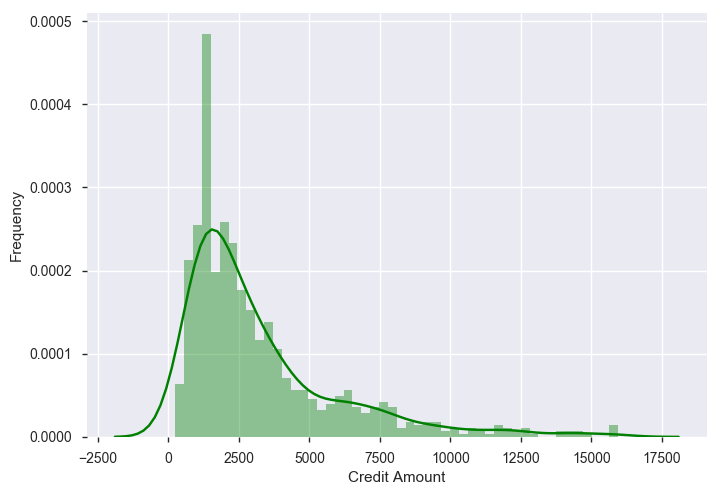

In [25]:
# Distribution analysis feature 2
ax = sns.distplot(data['cr_amt'],bins=50,color='g')
ax.set_xlabel('Credit Amount')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

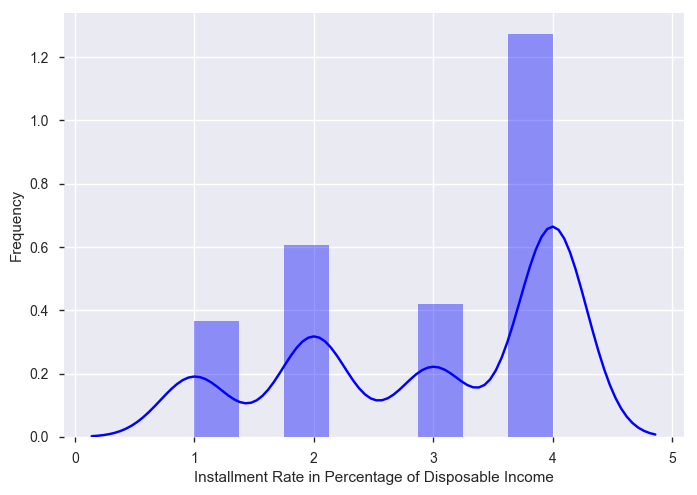

In [26]:
# Distribution analysis feature 3
ax = sns.distplot(data['inst_rate'],color='b')
ax.set_xlabel('Installment Rate in Percentage of Disposable Income')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

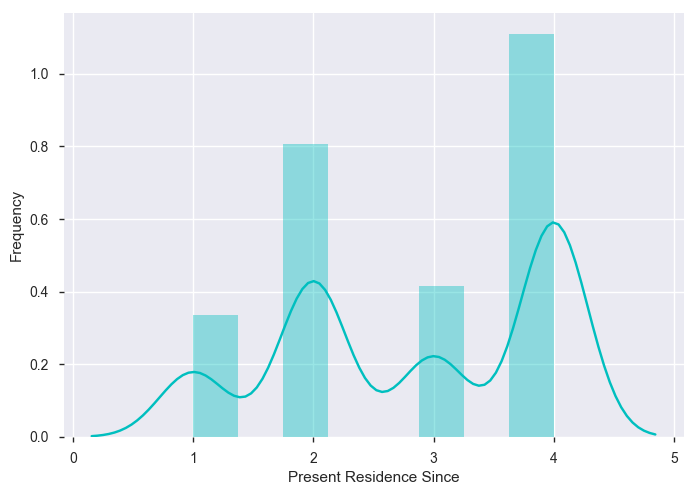

In [27]:
# Distribution analysis feature 4
ax = sns.distplot(data['res_dur'],color='c')
ax.set_xlabel('Present Residence Since')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

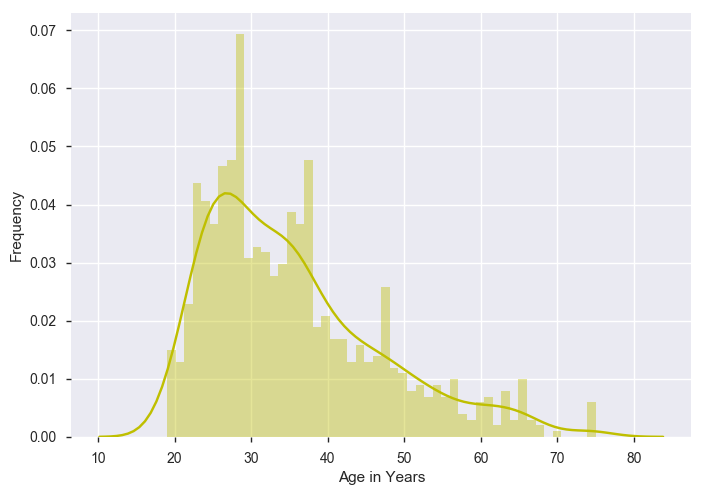

In [28]:
# Distribution analysis feature 5
ax = sns.distplot(data['age'],bins=50,color='y')
ax.set_xlabel('Age in Years')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

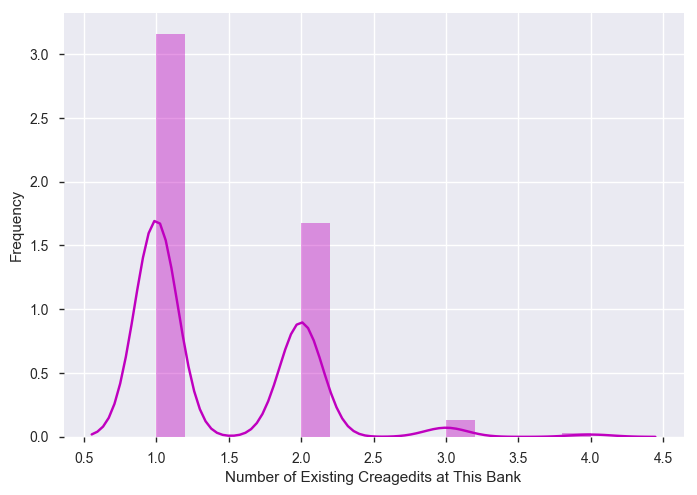

In [29]:
# Distribution analysis feature 6
ax = sns.distplot(data['num_cr'],color='m')
ax.set_xlabel('Number of Existing Creagedits at This Bank')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

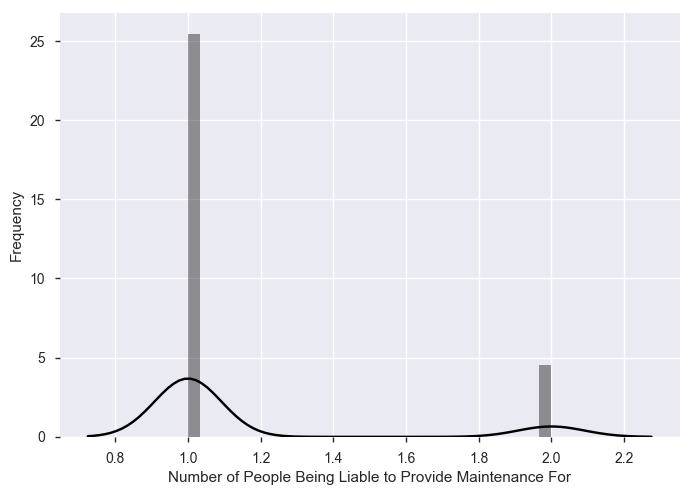

In [30]:
# Distribution analysis feature 7
ax = sns.distplot(data['num_liable'],color='k')
ax.set_xlabel('Number of People Being Liable to Provide Maintenance For')
ax.set_ylabel('Frequency')

## Categorical Feature

In [31]:
data.select_dtypes('int64').columns[:-1]

Index(['stat_acc', 'cr_hist', 'pur', 'sav_acc', 'emp_dur', 'stat_sex',
       'deb_guar_stat', 'prop', 'inst_plans', 'housing', 'job', 'phone',
       'expat_stat'],
      dtype='object')

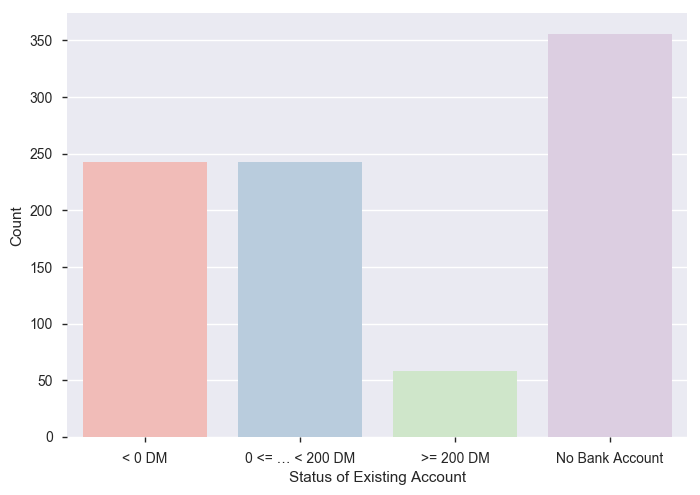

In [32]:
# Distribution analysis feature 8
ax = sns.countplot(x='stat_acc',data=data,palette='Pastel1')
label = ['< 0 DM', '0 <= … < 200 DM','>= 200 DM','No Bank Account']
ax.set_xlabel('Status of Existing Account')
ax.set_ylabel('Count')
ax.set_xticklabels(label);

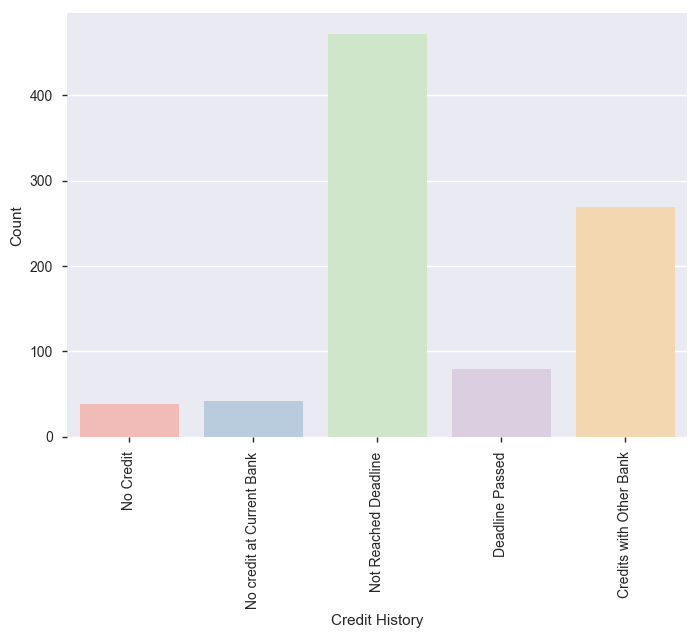

In [33]:
# Distribution analysis feature 9
ax = sns.countplot(x='cr_hist',data=data,palette='Pastel1')
label = ['No Credit', 'No credit at Current Bank',
         'Not Reached Deadline','Deadline Passed',
         'Credits with Other Bank']
ax.set_xlabel('Credit History')
ax.set_ylabel('Count')
ax.set_xticklabels(label,rotation='vertical');

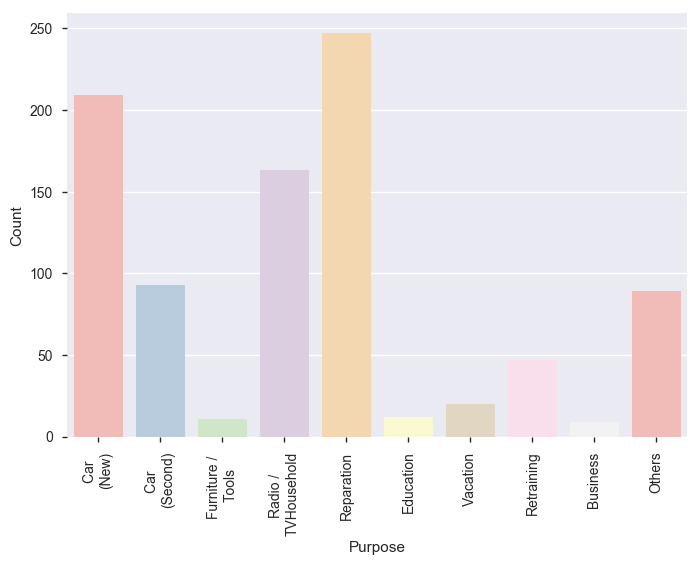

In [34]:
# Distribution analysis feature 10
ax = sns.countplot(x='pur',data=data,palette='Pastel1')
label = ['Car \n(New)', 'Car \n(Second)','Furniture / \nTools','Radio / \nTV'
         'Household','Reparation','Education','Vacation',
         'Retraining','Business','Others']
ax.set_xlabel('Purpose')
ax.set_ylabel('Count')
ax.set_xticklabels(label,rotation='vertical');

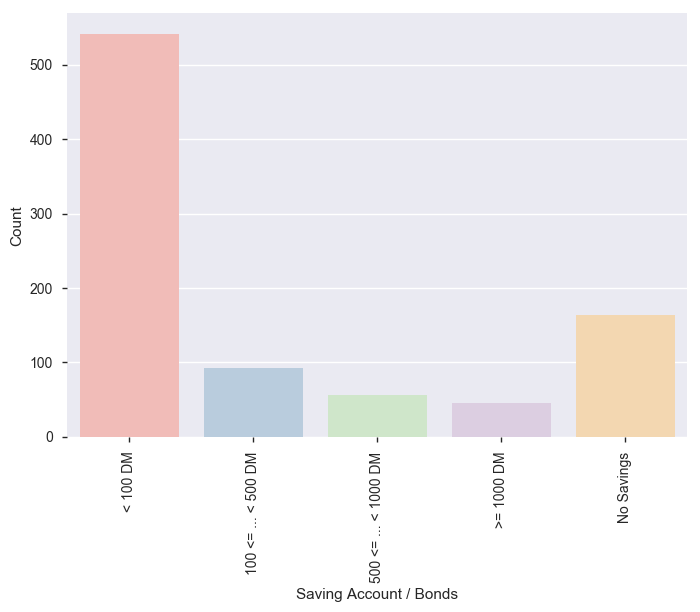

In [35]:
# Distribution analysis feature 11
ax = sns.countplot(x='sav_acc',data=data,palette='Pastel1')
label = ['< 100 DM','100 <= ... < 500 DM',
         '500 <= ... < 1000 DM','>= 1000 DM','No Savings']
ax.set_xlabel('Saving Account / Bonds')
ax.set_ylabel('Count')
ax.set_xticklabels(label,rotation='vertical');

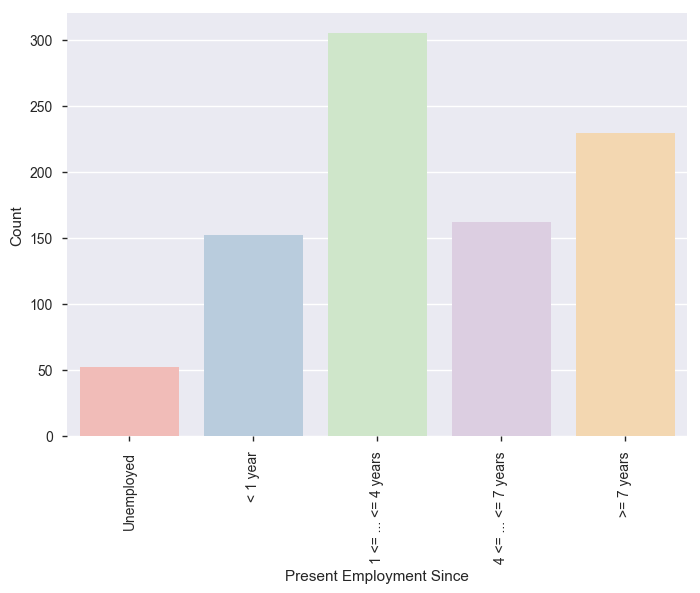

In [36]:
# Distribution analysis feature 12
ax = sns.countplot(x='emp_dur',data=data,palette='Pastel1')
label = ['Unemployed','< 1 year','1 <= ... <= 4 years',
         '4 <= ... <= 7 years','>= 7 years']
ax.set_xlabel('Present Employment Since')
ax.set_ylabel('Count')
ax.set_xticklabels(label,rotation='vertical');

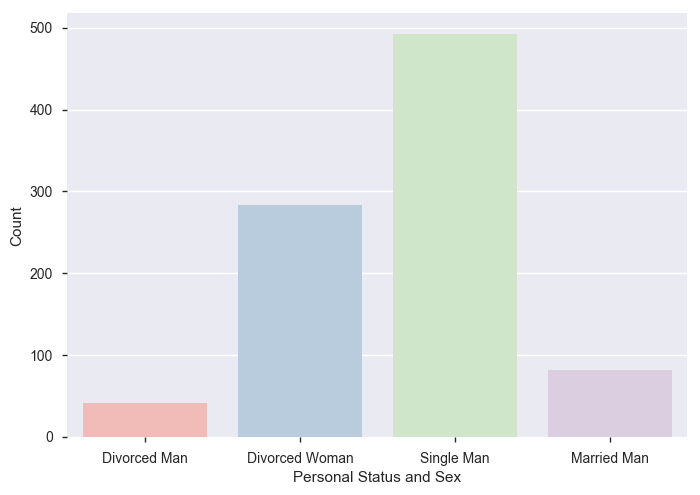

In [37]:
# Distribution analysis feature 13
ax = sns.countplot(x='stat_sex',data=data,palette='Pastel1')
label = ['Divorced Man','Divorced Woman','Single Man',
         'Married Man','Single Women']
ax.set_xlabel('Personal Status and Sex')
ax.set_ylabel('Count')
ax.set_xticklabels(label);

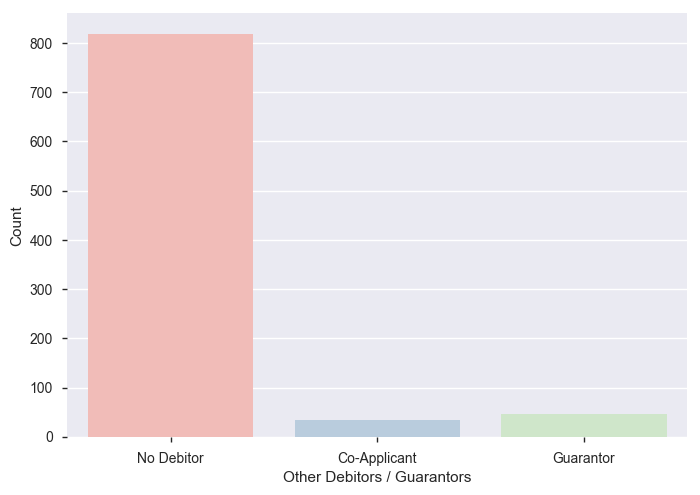

In [38]:
# Distribution analysis feature 14
ax = sns.countplot(x='deb_guar_stat',data=data,palette='Pastel1')
label = ['No Debitor','Co-Applicant','Guarantor']
ax.set_xlabel('Other Debitors / Guarantors')
ax.set_ylabel('Count')
ax.set_xticklabels(label);

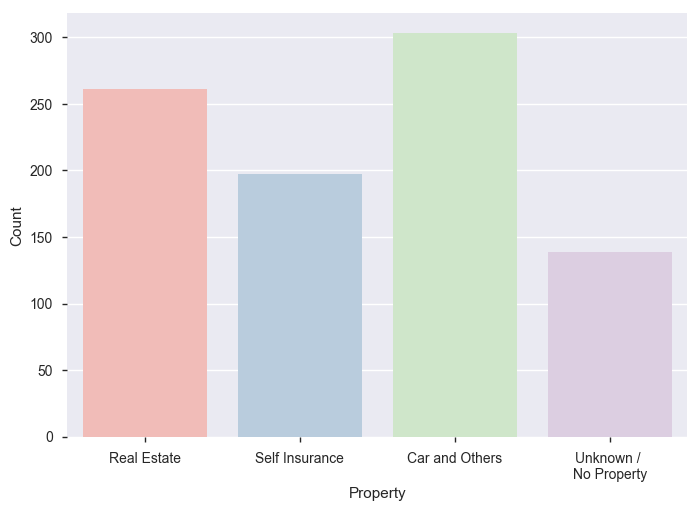

In [39]:
# Distribution analysis feature 15
ax = sns.countplot(x='prop',data=data,palette='Pastel1')
label = ['Real Estate','Self Insurance','Car and Others','Unknown / \nNo Property']
ax.set_xlabel('Property')
ax.set_ylabel('Count')
ax.set_xticklabels(label);

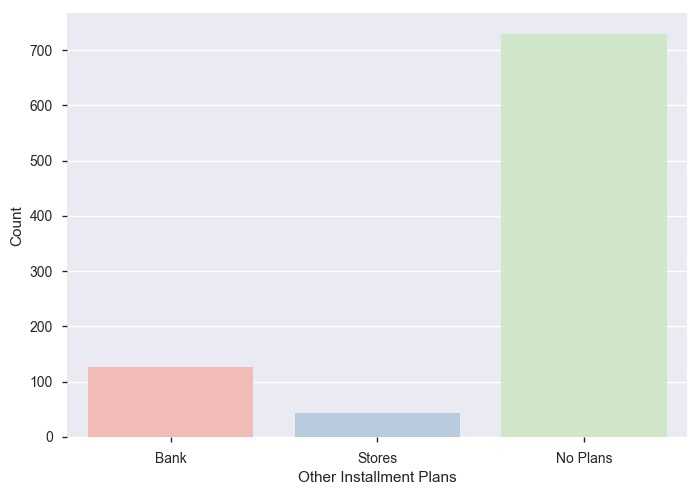

In [40]:
# Distribution analysis feature 16
ax = sns.countplot(x='inst_plans',data=data,palette='Pastel1')
label = ['Bank','Stores','No Plans']
ax.set_xlabel('Other Installment Plans')
ax.set_ylabel('Count')
ax.set_xticklabels(label);

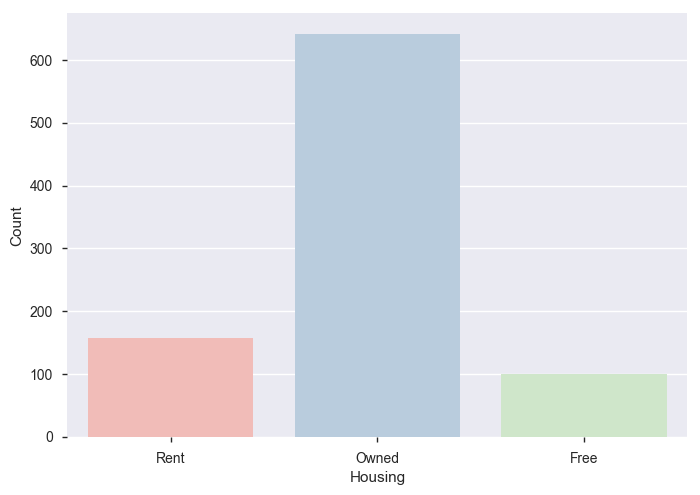

In [41]:
# Distribution analysis feature 17
ax = sns.countplot(x='housing',data=data,palette='Pastel1')
label = ['Rent','Owned','Free']
ax.set_xlabel('Housing')
ax.set_ylabel('Count')
ax.set_xticklabels(label);

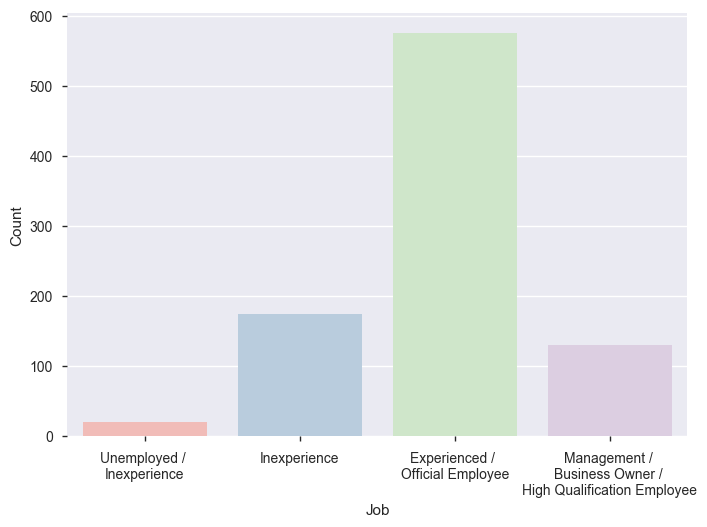

In [42]:
# Distribution analysis feature 18
ax = sns.countplot(x='job',data=data,palette='Pastel1')
label = ['Unemployed / \nInexperience','Inexperience',
         'Experienced / \nOfficial Employee','Management / \nBusiness Owner / \nHigh Qualification Employee']
ax.set_xlabel('Job')
ax.set_ylabel('Count')
ax.set_xticklabels(label);

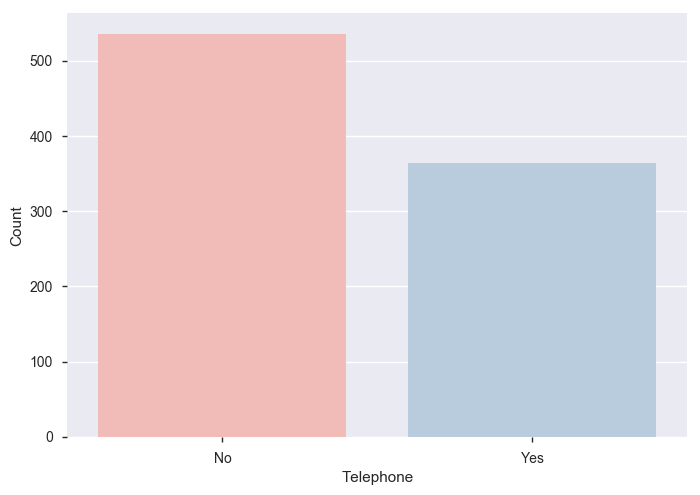

In [43]:
# Distribution analysis feature 19
ax = sns.countplot(x='phone',data=data,palette='Pastel1')
label = ['No','Yes']
ax.set_xlabel('Telephone')
ax.set_ylabel('Count')
ax.set_xticklabels(label);

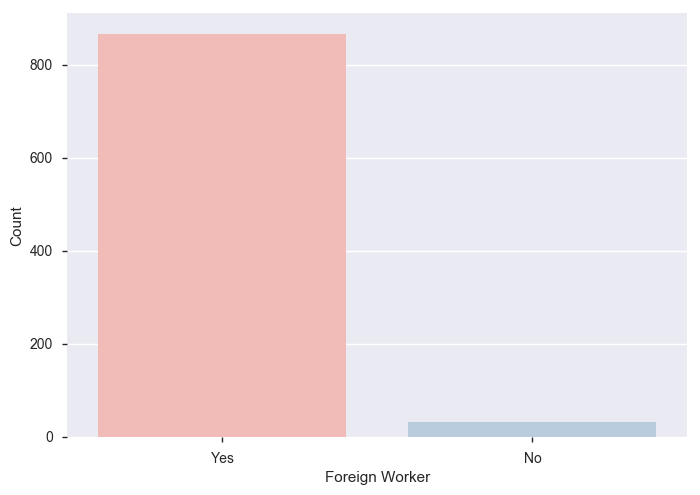

In [44]:
# Distribution analysis feature 20
ax = sns.countplot(x='expat_stat',data=data,palette='Pastel1')
label = ['Yes','No']
ax.set_xlabel('Foreign Worker')
ax.set_ylabel('Count')
ax.set_xticklabels(label);